In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.15.1


In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# number of trials
n = 10

# Simulate outcome variable
k = 5

In [4]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    theta = pm.Beta("theta", alpha=1, beta=1)

    # Likelihood (sampling distribution) of observations
    k_obs = pm.Binomial("k_obs", p=theta, n=n, observed=k)

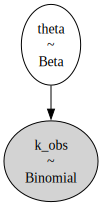

In [5]:
pm.model_to_graphviz(basic_model)

---

In [6]:
srrs2 = pd.read_csv(pm.get_data("srrs2.dat"))
srrs2.columns = srrs2.columns.map(str.strip)
srrs_mn = srrs2[srrs2.state == "MN"].copy()
srrs_mn["fips"] = srrs_mn.stfips * 1000 + srrs_mn.cntyfips
print(srrs_mn.shape)
srrs_mn.head()

(919, 26)


,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips
5080,5081,MN,MN,27,55735,5,1,1,3,N,...,12088,12288,2.2,9.7,1146.499190,1,0,1,AITKIN,27001
5081,5082,MN,MN,27,55748,5,1,0,4,Y,...,11888,12088,2.2,14.5,471.366223,0,0,1,AITKIN,27001
5082,5083,MN,MN,27,55748,5,1,0,4,Y,...,20288,21188,2.9,9.6,433.316718,0,0,1,AITKIN,27001
5083,5084,MN,MN,27,56469,5,1,0,4,Y,...,122987,123187,1.0,24.3,461.623670,0,0,1,AITKIN,27001
5084,5085,MN,MN,27,55011,3,1,0,4,Y,...,12888,13088,3.1,13.8,433.316718,0,0,3,ANOKA,27003


In [7]:
cty = pd.read_csv(pm.get_data("cty.dat"))
cty_mn = cty[cty.st == "MN"].copy()
cty_mn["fips"] = 1000 * cty_mn.stfips + cty_mn.ctfips
cty_mn.head()

,stfips,ctfips,st,cty,lon,lat,Uppm,fips
1326,27,1,MN,AITKIN,-93.415,46.608,0.502054,27001
1327,27,3,MN,ANOKA,-93.246,45.273,0.428565,27003
1328,27,5,MN,BECKER,-95.674,46.935,0.892741,27005
1329,27,7,MN,BELTRAMI,-94.937,47.974,0.552472,27007
1330,27,9,MN,BENTON,-93.998,45.699,0.866849,27009


In [8]:
srrs_mn = srrs_mn.merge(cty_mn[["fips", "Uppm"]], on="fips")
srrs_mn = srrs_mn.drop_duplicates(subset="idnum")
print(srrs_mn.shape)
srrs_mn.head()

(919, 27)


,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm
0,5081,MN,MN,27,55735,5,1,1,3,N,...,12288,2.2,9.7,1146.499190,1,0,1,AITKIN,27001,0.502054
1,5082,MN,MN,27,55748,5,1,0,4,Y,...,12088,2.2,14.5,471.366223,0,0,1,AITKIN,27001,0.502054
2,5083,MN,MN,27,55748,5,1,0,4,Y,...,21188,2.9,9.6,433.316718,0,0,1,AITKIN,27001,0.502054
3,5084,MN,MN,27,56469,5,1,0,4,Y,...,123187,1.0,24.3,461.623670,0,0,1,AITKIN,27001,0.502054
4,5085,MN,MN,27,55011,3,1,0,4,Y,...,13088,3.1,13.8,433.316718,0,0,3,ANOKA,27003,0.428565


In [10]:
u = np.log(srrs_mn.Uppm).unique()
u

array([-0.6890476 , -0.84731286, -0.11345877, -0.59335253, -0.14289048,
        0.38705671,  0.27161366,  0.2775787 , -0.33231549,  0.09586457,
       -0.60821981,  0.27368456, -0.73532009,  0.34378118, -0.05986041,
       -0.50499598,  0.33956032, -0.6333907 , -0.02414516,  0.26385546,
        0.15571232,  0.29502505,  0.41491366,  0.22420699,  0.19661065,
       -0.09652081,  0.50352907, -0.40059698, -0.75187223, -0.66334763,
        0.30902028, -0.05338601,  0.10973294, -0.00780337, -0.88182892,
        0.31102988, -0.69159638, -0.68170885,  0.19444774,  0.44490375,
        0.39473441,  0.14960034,  0.01376483,  0.16586184,  0.14042259,
        0.02395087, -0.21005952, -0.09322665,  0.26093247,  0.39884994,
        0.24804687,  0.40545177,  0.26522172,  0.24315008, -0.20473037,
       -0.07402767, -0.16329217,  0.47860404,  0.26611108,  0.28114827,
       -0.41805351,  0.36632226,  0.38057798,  0.19314609,  0.52802487,
       -0.21204536,  0.06311563, -0.68343648,  0.23721212, -0.47

In [11]:
n = len(srrs_mn)
n

919

In [13]:
srrs_mn.county = srrs_mn.county.map(str.strip)
county, mn_counties = srrs_mn.county.factorize()
print(mn_counties.shape)
srrs_mn["county_code"] = county
radon = srrs_mn.activity
srrs_mn["log_radon"] = log_radon = np.log(radon + 0.1).values
floor_measure = srrs_mn.floor.values
print(log_radon.shape)
print(floor_measure.shape)

(85,)
(919,)
(919,)


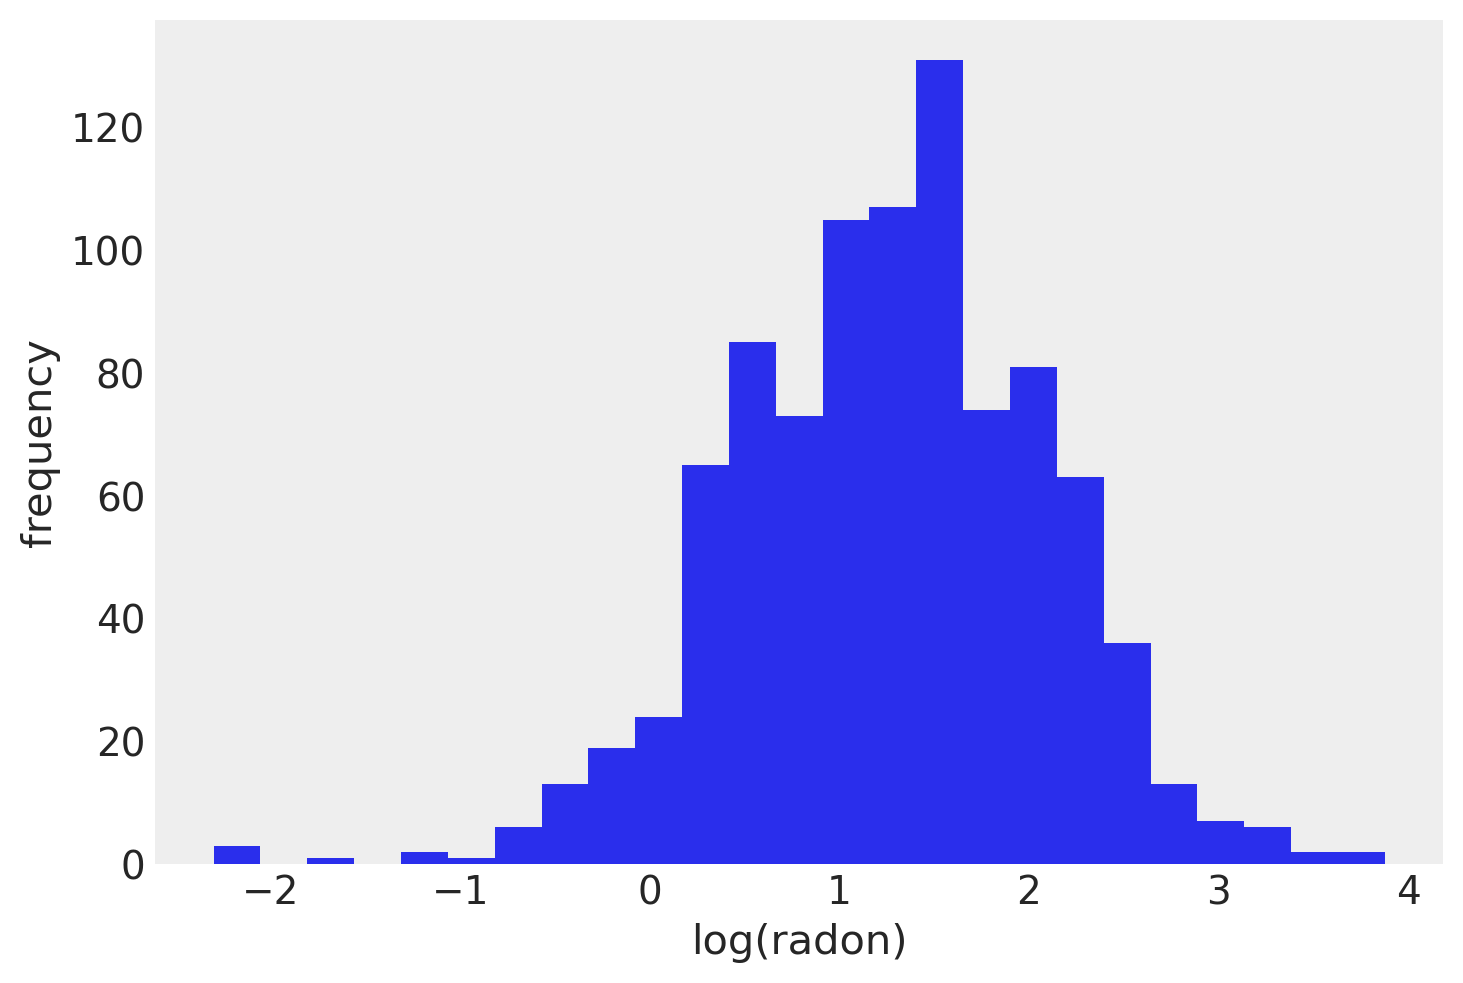

In [26]:
srrs_mn.log_radon.hist(bins=25, grid=False)
plt.xlabel("log(radon)")
plt.ylabel("frequency");

In [27]:
with pm.Model() as pooled_model:
    floor_ind = pm.MutableData("floor_ind", floor_measure, dims="obs_id")
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.Exponential("sigma", 5)
    theta = alpha + beta * floor_ind
    y = pm.Normal("y", theta, sigma=sigma, observed=log_radon, dims="obs_id")

/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/pymc/data.py:304: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


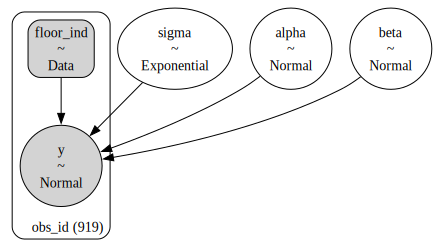

In [28]:
pm.model_to_graphviz(pooled_model)

In [ ]:
coords = {"county": mn_counties}

with pm.Model(coords=coords) as unpooled_model:
    floor_ind = pm.MutableData("floor_ind", floor_measure, dims="obs_id")

    alpha = pm.Normal("alpha", 0, sigma=10, dims="county")
    beta = pm.Normal("beta", 0, sigma=10)
    sigma = pm.Exponential("sigma", 1)

    theta = alpha[county] + beta * floor_ind

    y = pm.Normal("y", theta, sigma=sigma, observed=log_radon, dims="obs_id")